In [12]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score,accuracy_score,confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
best_features=['Average Packet Size',
 'Packet Length Min',
 'Dst IP',
 'Bwd Init Win Bytes',
 'Dst Port',
 'Fwd Packet Length Min',
 'Protocol',
 'Idle Mean',
 'PSH Flag Count',
 'Bwd Packets/s',
 'Src IP',
 'Bwd Packet Length Min',
 'Idle Std',
 'traffic nature']

In [14]:
df1 = pd.read_csv("testDataset.csv")
X_test = df1.loc[:,best_features]
y_test = df1["traffic nature"]
X_test = X_test.drop("traffic nature",axis=1)
print(X_test.shape,y_test.shape)


(22078, 13) (22078,)


In [15]:
df = pd.read_csv('balancedDarknet.csv')
X_train = df.loc[:,best_features]
X_train = X_train.drop("traffic nature",axis=1)
y_train = df["traffic nature"]
print(X_train.shape,y_train.shape)

(213317, 13) (213317,)


In [16]:
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(X_train, y_train)

y_pred = rfc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9977353021106984


In [17]:
f1_score = f1_score(y_test,y_pred,average='weighted')
print(f"F1-score: {f1_score}")

F1-score: 0.9977379013725788


In [28]:
confusion_matrix = confusion_matrix(y_test,y_pred)

In [37]:
confusion_matrix

array([[13870,     3,     0,     0],
       [    0,  4266,     6,    27],
       [    1,     4,  3663,     1],
       [    0,    29,     0,   217]])

In [30]:
TRAFFIC_NATURE_CLASSES=["NON THOR","NON VPN","VPN","THOR"]

In [42]:
def display_confusion_matrix(cmat, score, precision, recall):
    plt.figure(figsize=(15,15))
    ax = plt.gca()
    ax.matshow(cmat, cmap='Reds')
    ax.set_xticks(range(len(TRAFFIC_NATURE_CLASSES)))
    ax.set_xticklabels(TRAFFIC_NATURE_CLASSES, fontdict={'fontsize': 13})
    plt.setp(ax.get_xticklabels(), rotation=45, ha="left", rotation_mode="anchor")
    ax.set_yticks(range(len(TRAFFIC_NATURE_CLASSES)))
    ax.set_yticklabels(TRAFFIC_NATURE_CLASSES, fontdict={'fontsize': 13})
    plt.setp(ax.get_yticklabels(), rotation=45, ha="right", rotation_mode="anchor")
    titlestring = ""
    if score is not None:
        titlestring += 'f1 = {:.3f} '.format(score)
    if precision is not None:
        titlestring += '\nprecision = {:.3f} '.format(precision)
    if recall is not None:
        titlestring += '\nrecall = {:.3f} '.format(recall)
    if len(titlestring) > 0:
        ax.text(1,0, titlestring, fontdict={'fontsize': 18, 'horizontalalignment':'right', 'verticalalignment':'top', 'color':'#804040'})
    plt.show()

In [45]:
from sklearn.metrics import precision_score,recall_score

In [46]:
precision_score = precision_score(y_pred,y_test,average="weighted")
print(f"precision score: {precision_score}")

recall_score = recall_score(y_pred,y_test,average="weighted")
print(f"the recall : {recall_score}")

precision score: 0.9967897537040943
the recall : 0.9967854393987413


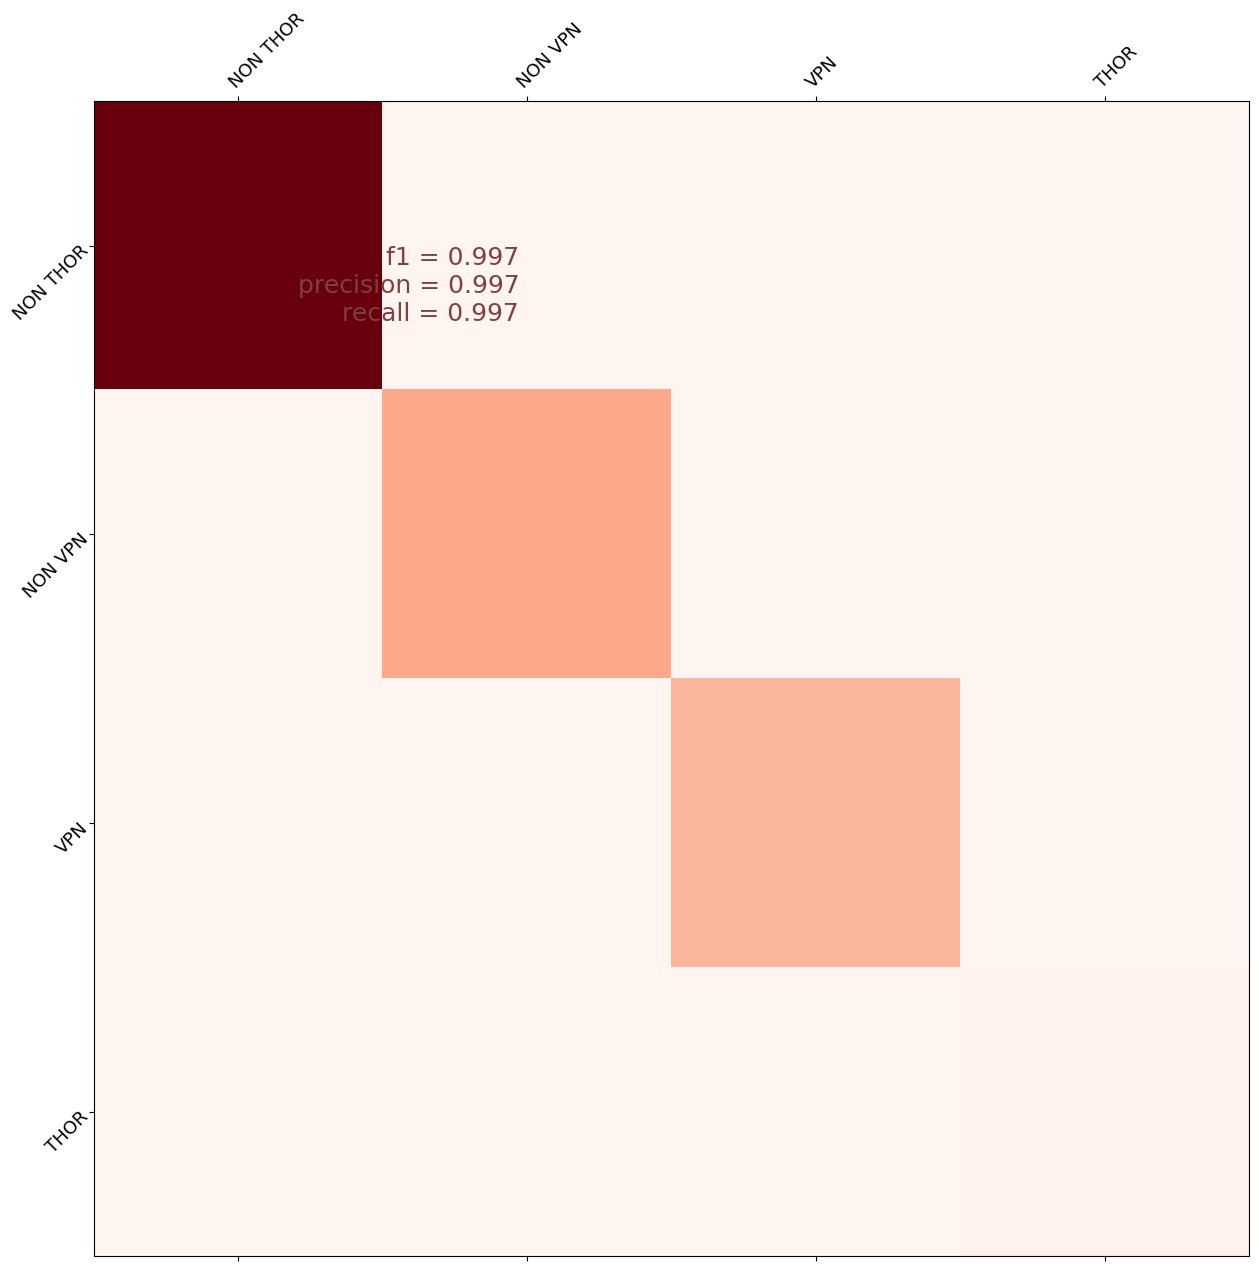

In [43]:
display_confusion_matrix(confusion_matrix,f1_score,precision_score,recall_score)